<a href="https://colab.research.google.com/github/michaelherediaperez/mecanica_de_solidos_un/blob/main/codigos/cap_02/02_06_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.6.1. Particularización de la matriz de tensiones al caso tridimensional

|Quién | Fecha | Qué hizo |
| ---  | ---   | ---      |
|Michael Heredia Pérez, <mherediap@unal.edu.co> | Julio 13, 2022  | Conversión de código de MAXIMA a Python|
|Diego Andrés Alvarez, <daalvarez@unal.edu.co>  | Agosto 29, 2022 | Mejorando comentarios                  |

In [1]:
import sympy as sp  # Librería para cálculo simbólico
sp.init_printing()  # Para imprimir bonito

Se definen las variables simbólicas necesarias.

In [2]:
sx, sy, sz    = sp.symbols("sigma_x, sigma_y, sigma_z")
txy, txz, tyz = sp.symbols("tau_xy,  tau_xz,  tau_yz")

a1, a2, a3    = sp.symbols("alpha_1:4")
b1, b2, b3    = sp.symbols("beta_1:4")
g1, g2, g3    = sp.symbols("gamma_1:4")

Se define la matriz de tensiones en coordenadas rectangulares $\boldsymbol{\sigma}$

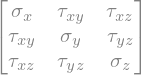

In [3]:
sigma = sp.Matrix([ [sx, txy, txz],
                    [txy, sy, tyz],
                    [txz, tyz, sz] ])
sigma

Se define la matriz de transformación: $\boldsymbol{T}$

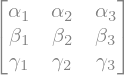

In [4]:
T = sp.Matrix([ [a1, a2, a3],     
                [b1, b2, b3],      
                [g1, g2, g3] ])

T

Se calcula la matriz de tensiones $\boldsymbol{\sigma}'$ en el sistema de coordenadas especificadas por los vectores definidos en la matriz $\boldsymbol{T}$. Recuerde que

\begin{equation*}
\boldsymbol{\sigma}' = \boldsymbol{T}^\intercal \boldsymbol{\sigma} \boldsymbol{T}.
\end{equation*}

In [5]:
sigmaP = T.T*sigma*T        # Eq. (2.18 del main)

Se extraen los términos de la matriz de tensiones $\boldsymbol{\sigma}'$:

$\sigma_x' = $ 

In [6]:
sxp   = sp.factor(sigmaP[0,0])  # elemento 1,1 de la matriz sigmaP
syp   = sp.factor(sigmaP[1,1])
szp   = sp.factor(sigmaP[2,2])
typzp = sp.factor(sigmaP[1,2])  # elemento 2,3 de la matriz sigmaP
txpzp = sp.factor(sigmaP[0,2])  # elemento 1,3 de la matriz sigmaP 
txpyp = sp.factor(sigmaP[0,1])  # elemento 1,2 de la matriz sigmaP 

In [7]:
sp.Eq(sp.Symbol(r"\sigma_{x'}"), sxp)

In [8]:
sp.Eq(sp.Symbol(r"\sigma_{y'}"), syp)

In [9]:
sp.Eq(sp.Symbol(r"\sigma_{z'}"), szp)

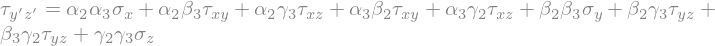

In [10]:
sp.Eq(sp.Symbol(r"\tau_{y'z'}"), typzp)

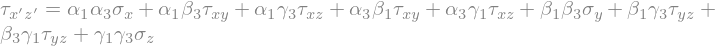

In [11]:
sp.Eq(sp.Symbol(r"\tau_{x'z'}"), txpzp)

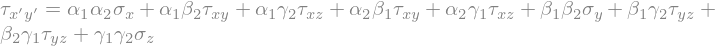

In [12]:
sp.Eq(sp.Symbol(r"\tau_{x'y'}"), txpyp)

Las ecuaciones anteriores pueden expresarse de forma matricial, como $\boldsymbol{\sigma'} = \boldsymbol{T}_{\boldsymbol{\sigma}} \boldsymbol{\sigma}$

In [21]:
Tsigma = sp.linear_eq_to_matrix([sxp, syp, szp, typzp, txpzp, txpyp ], (sx, sy, sz, tyz, txz, txy))[0]

<IPython.core.display.Math object>

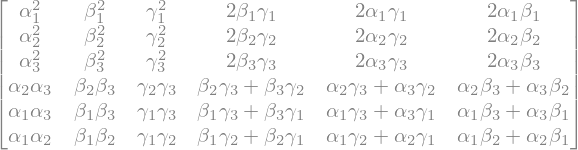

In [23]:
from IPython.display import display, Math
display(Math(r'\boldsymbol{T}_{\boldsymbol{\sigma}} ='), Tsigma)